In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
stock_data = pd.read_csv('Monte_Carlo_stocks_data.csv')
stock_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,708.450012,710.650024,697.849976,701.174988,648.758240,540568
1,2017-01-04,701.950012,720.750000,701.950012,709.650024,656.599670,962940
2,2017-01-05,716.750000,729.500000,712.500000,716.549988,662.983887,986338
3,2017-01-06,716.500000,720.724976,692.500000,696.075012,644.039551,885408
4,2017-01-09,695.075012,699.400024,686.099976,693.950012,642.073364,343776
...,...,...,...,...,...,...,...
213,2017-11-13,903.000000,923.900024,901.950012,906.299988,846.484619,1148730
214,2017-11-14,911.000000,918.000000,892.000000,896.299988,837.144531,447956
215,2017-11-15,880.000000,901.500000,864.000000,872.500000,814.915405,454129
216,2017-11-16,877.650024,900.000000,862.799988,895.599976,836.490845,552550


In [3]:
stock_data.set_index('Date',inplace=True)
prices = stock_data['Close']
prices

Date
2017-01-03    701.174988
2017-01-04    709.650024
2017-01-05    716.549988
2017-01-06    696.075012
2017-01-09    693.950012
                 ...    
2017-11-13    906.299988
2017-11-14    896.299988
2017-11-15    872.500000
2017-11-16    895.599976
2017-11-17    893.900024
Name: Close, Length: 218, dtype: float64

In [4]:
returns = prices.pct_change()
returns

Date
2017-01-03         NaN
2017-01-04    0.012087
2017-01-05    0.009723
2017-01-06   -0.028574
2017-01-09   -0.003053
                ...   
2017-11-13    0.006720
2017-11-14   -0.011034
2017-11-15   -0.026554
2017-11-16    0.026476
2017-11-17   -0.001898
Name: Close, Length: 218, dtype: float64

In [5]:
last = prices[-1]
num_sims = 1000
num_days = 252
prices_std = returns.std()
sim_df = pd.DataFrame()

In [6]:
for i in range(num_sims):
    series = []
    price = last * (1 + np.random.normal(0, prices_std))
    series.append(price)
    for j in range(1, num_days):
        price = series[j - 1] * (1 + np.random.normal(0, prices_std))
        series.append(price)
    sim_df = sim_df.copy()
    sim_df[i] = series
sim_df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,889.343358,888.564771,910.153720,913.205439,898.235146,870.365923,889.676121,885.874747,879.158071,884.985017,...,888.973793,876.465207,902.044321,896.556687,906.904486,864.003672,895.364476,904.074308,901.420398,884.125125
1,890.882436,879.747265,919.677462,886.099064,904.292560,884.956526,911.014878,882.574899,891.183798,862.449648,...,862.454202,900.061956,886.737127,907.753490,906.470037,831.232634,916.028158,900.020306,891.415490,899.841842
2,903.516842,897.045797,892.671479,888.965518,921.669860,887.212165,912.547791,894.411320,877.566005,890.439212,...,884.850876,887.740834,883.536653,927.691294,908.088971,837.756940,923.245428,911.114834,909.065492,930.060838
3,922.068345,902.213216,880.241748,887.078355,948.761397,886.561110,876.238517,911.951505,876.403861,898.593275,...,914.811070,885.186979,840.314794,906.882481,922.377483,857.594122,910.488222,899.771727,942.552590,944.011089
4,930.058845,885.389753,882.243758,894.089040,952.501631,861.713460,871.703330,886.599465,866.696434,912.234569,...,956.019868,890.653988,868.937578,891.844903,895.007144,844.682331,889.610025,900.687288,938.660860,944.495894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1394.715357,836.894410,1468.420477,809.437537,922.752558,966.856206,1058.763138,783.544830,856.266445,1056.716885,...,930.466720,916.596515,564.271435,866.752385,688.662664,860.208878,1394.720699,1160.390150,584.359294,1007.625447
248,1426.439508,855.257564,1446.906430,805.942397,929.128957,940.487635,1048.015609,787.501672,868.955938,1059.408229,...,919.055766,962.922707,565.789305,850.703976,660.846902,844.601896,1379.987727,1147.990518,587.781823,1020.625253
249,1419.333439,864.559857,1478.978596,786.250405,921.741285,927.264348,1032.828108,801.107983,874.737569,1053.825984,...,912.201286,990.170262,551.555171,863.504506,650.646301,842.763071,1395.138010,1144.600058,578.876088,1029.227237
250,1367.316893,860.801821,1506.075305,781.235304,921.828151,938.540068,1049.018369,795.672141,872.535128,1044.871252,...,931.477381,973.132208,525.635938,851.783670,657.433684,851.483114,1406.882200,1162.413717,577.170688,1005.639821


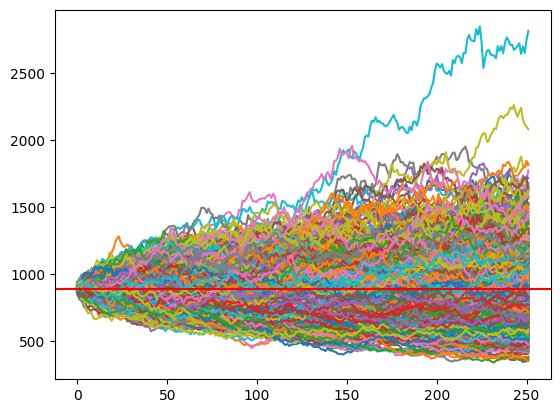

In [7]:
plt.plot(sim_df)
plt.axhline(y=last, color="r")
plt.show()